In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import spacy

# First 1000 words cont...

In [5]:
df = pd.read_csv('../data/words_with_translation.csv', sep = ';', parse_dates= True)

In [6]:
df = df.replace('German', 'german')

In [7]:
df.head()

,date,word,language,month,Leo_months,en_word
0,2020-08-07,Mama,neutral,2020-08,9,Mama
1,2020-09-24,agua,spanish,2020-09,11,Water
2,2020-10-07,Abuela,spanish,2020-10,11,Grandmother
3,2020-10-31,luna,spanish,2020-10,12,Moon
4,2020-11-05,Banane,german,2020-11,12,banana


### Color dictionary

In [314]:
colors = ['#F28123','#A9F0D1','#82A0BC']

In [52]:
colors_dic = {'spanish':'#F28123', 'german':'#A9F0D1', 'neutral':'#82A0BC'}

## Appearance of duplicated concepts

In [8]:
len(df.word.unique())

946

In [9]:
df = df.drop_duplicates(subset= 'word', keep = 'first')

In [10]:
df.en_word = df.en_word.str.lower()

In [11]:
len(df.en_word.unique())

805

In [12]:
df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
981,2022-01-14,ándale,spanish,2022-01,26,come along
991,2022-01-16,Welt,german,2022-01,26,world
994,2022-01-16,paja,spanish,2022-01,26,straw
990,2022-01-16,weit,german,2022-01,26,far


In [13]:
duplicated_concepts = df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])

In [14]:
concepts = df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])['en_word'].unique()

In [15]:
word_order = np.arange(len(df[df.duplicated(subset = 'en_word', keep = 'first')]))+1

In [16]:
word_order_dict = dict(zip(concepts,word_order))

In [17]:
duplicated_concepts

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
981,2022-01-14,ándale,spanish,2022-01,26,come along
991,2022-01-16,Welt,german,2022-01,26,world
994,2022-01-16,paja,spanish,2022-01,26,straw
990,2022-01-16,weit,german,2022-01,26,far


In [18]:
duplicated_concepts['order'] = duplicated_concepts['en_word'].map(word_order_dict)

In [19]:
duplicated_concepts.sort_values(by = 'order').head()

,date,word,language,month,Leo_months,en_word,order
1,2020-09-24,agua,spanish,2020-09,11,water,1
100,2021-04-22,Wasser,german,2021-04,18,water,1
42,2021-02-15,Oma,german,2021-02,15,grandmother,2
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother,2
3,2020-10-31,luna,spanish,2020-10,12,moon,3


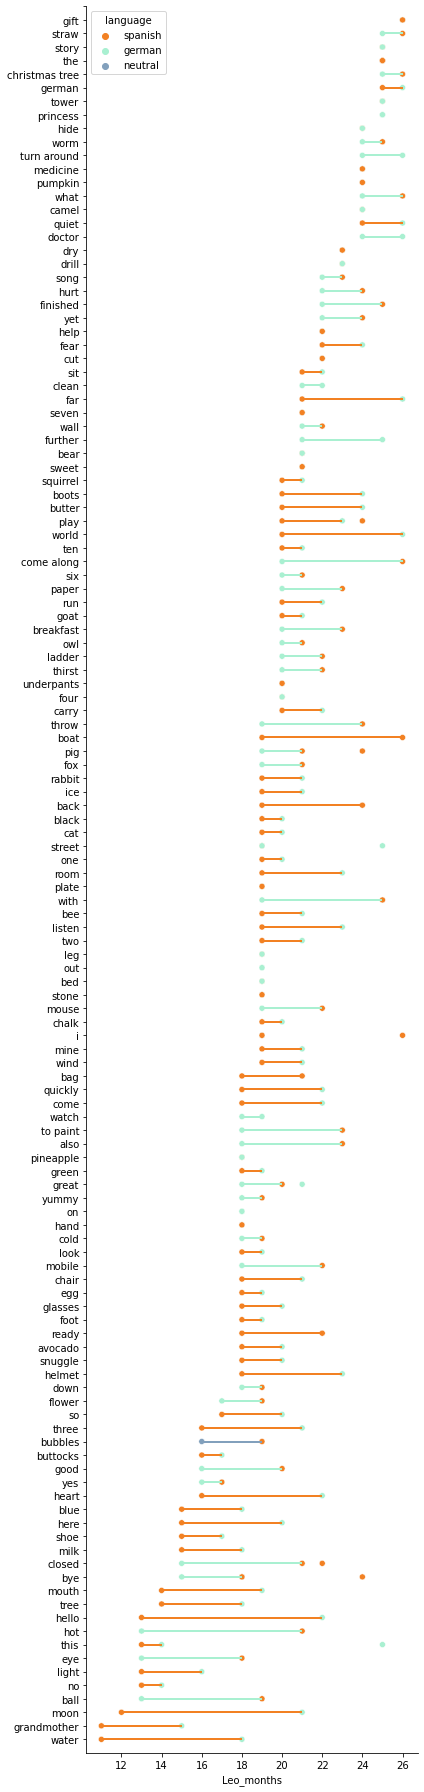

In [317]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,25))
ax = sns.scatterplot(data = duplicated_concepts, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors)

major_ticks = np.arange(1, 130, 1)

ax.set_ylim(0, 128)
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

word = 'water'
for word in concepts:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)

plt.tight_layout()
plt.savefig('concepts_first_language.png')

#### `PLOT FOR TALK:` appearance of duplicated concepts

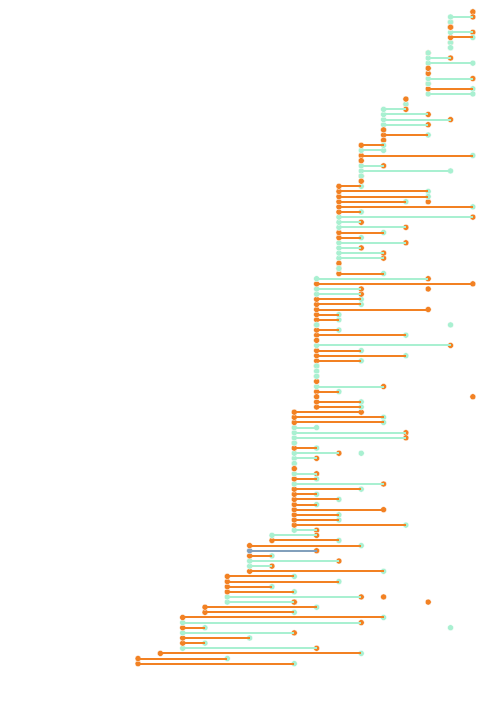

In [328]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7,10))
ax = sns.scatterplot(data = duplicated_concepts, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors,
               legend = False)

major_ticks = np.arange(1, 130, 1)

ax.set_ylim(0, 128)
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")
ax.set_xlabel("Kid's months")

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

word = 'water'
for word in concepts:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)
    
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(10,27,1))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
plt.tight_layout()
plt.savefig('concepts_first_language_presentation.png',transparent=True)

#### `PLOT FOR TALK:` appearance of duplicated concepts first 10 words

In [31]:
concepts[0:10]

array(['water', 'grandmother', 'moon', 'ball', 'no', 'light', 'eye',
       'this', 'hot', 'hello'], dtype=object)

In [32]:
first_ten = duplicated_concepts.loc[duplicated_concepts.en_word.isin(concepts[0:10])]

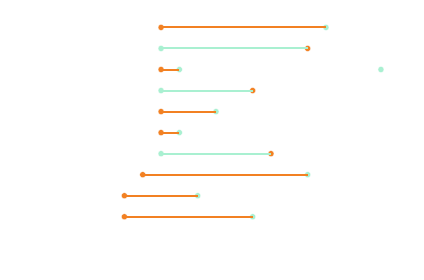

In [339]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
ax = sns.scatterplot(data = first_ten, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors[0:2],
               legend = False)

major_ticks = np.arange(1, 11, 1)

ax.set_ylim(0, 11)
ax.set_xlim(10, 27)
ax.set_xticks(np.arange(10,27,1))
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")
ax.set_xlabel("Kid's months")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(10,27,1))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

for word in concepts[0:10]:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)

plt.tight_layout()
plt.savefig('concepts_first_language_first months.png', transparent = True)

## Expansion of semantic space

In [22]:
concepts_df = df.drop_duplicates(subset= 'en_word', keep = 'first')

In [26]:
nlp = spacy.load('en_core_web_md')

In [30]:
concepts_v = []
vectors = []
for concept in list(df['en_word']):
    if len(nlp(concept)) > 1:
        lemma_ = [token.lemma_ for token in nlp(concept) if not token.is_oov][0]
    else: 
        lemma_ = [token.lemma_ for token in nlp(concept)][0]
    if nlp(lemma_)[0].is_oov == False:
        vectors.append(nlp(lemma_).vector)
        concepts_v.append(concept)

In [31]:
df_vec = pd.DataFrame(vectors)

In [32]:
df_vec['concept'] = concepts_v

In [33]:
df_vec.head(3)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,concept
0,1.81230,1.9200,-2.3798,-1.7641,-1.1663,1.31190,-4.26470,-1.3337,-0.890990,2.9228,...,0.53279,-1.2408,-3.9719,-1.4885,-2.1876,0.57580,2.8266,-2.90380,-0.73066,mama
1,0.43850,2.3042,-5.3033,2.6234,1.4533,-4.87860,-1.08200,7.4434,-1.041600,3.1416,...,-2.37400,4.5912,-2.3841,-9.1163,-3.3712,0.12165,-4.4262,0.47888,-1.13710,water
2,-0.40287,-1.4475,-2.4411,-2.1084,2.1523,0.45729,0.95336,3.8357,-0.061487,4.4103,...,-0.82541,-2.3386,-3.1521,-1.9668,-2.0447,0.70859,2.4188,-3.41230,0.59503,grandmother


### PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
X = df_vec.drop('concept', axis = 1)

In [36]:
pca = PCA()

In [37]:
W = pca.fit_transform(X)

In [38]:
components = np.arange(1, W.shape[1]+1)

Text(0, 0.5, 'explained variance ratio [%]')

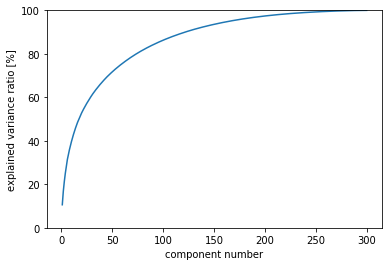

In [39]:
plt.plot(components, np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('component number')
plt.ylim(0,100)
plt.ylabel('explained variance ratio [%]')

Text(0, 0.5, 'PC 2')

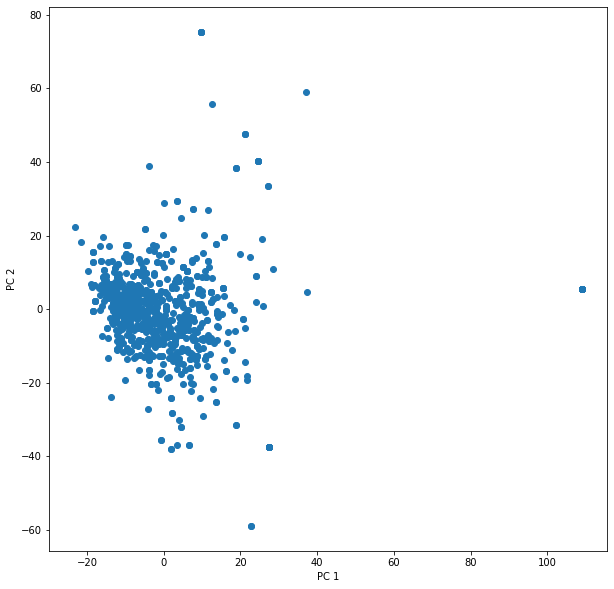

In [40]:
plt.figure(figsize = (10,10))
plt.scatter(W[:,0], W[:,1])
plt.xlabel(f'PC 1')
plt.ylabel(f'PC 2')

In [41]:
concepts_pca = pd.DataFrame({'concept':df_vec['concept'], 'PC1':W[:,0], 'PC2': W[:,1]})

In [42]:
concepts_pca = pd.merge(concepts_pca, concepts_df, how = 'inner', left_on= 'concept', right_on= 'en_word').drop_duplicates(subset = 'en_word').drop('month', axis = 1)

In [43]:
concepts_pca.head()

,concept,PC1,PC2,date,word,language,Leo_months,en_word
0,mama,-15.697594,8.080725,2020-08-07,Mama,neutral,9,mama
1,water,6.730839,-13.569035,2020-09-24,agua,spanish,11,water
3,grandmother,-1.407211,-3.726865,2020-10-07,Abuela,spanish,11,grandmother
5,moon,-11.548849,0.534255,2020-10-31,luna,spanish,12,moon
7,banana,-12.932847,1.022491,2020-11-05,Banane,german,12,banana


In [44]:
colors = ['#82A0BC','#F28123','#0099ab']

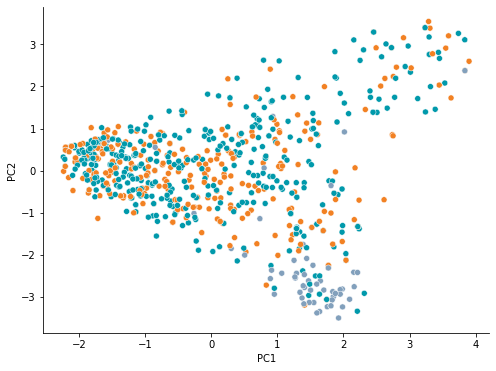

In [136]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = concepts_pca,
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors, 
               legend= False)
sns.despine()

In [137]:
concepts_pca['word']

0            Mama
1            agua
3          Abuela
5            luna
7          Banane
          ...    
924    compartir 
925     Fahrtende
926     schimpfen
927     Schnupfen
928           nur
Name: word, Length: 788, dtype: object

In [144]:
list(concepts_pca['word'])

['Mama',
 'agua',
 'Abuela',
 'luna',
 'Banane',
 'Pepe',
 'Ball',
 'más',
 'no',
 'Mami',
 'luz',
 'Auge',
 'ups',
 'lechita',
 'este',
 'heiß',
 'hola',
 'Marta',
 'árbol',
 'boca',
 'kaputt',
 'tschüss',
 'wow',
 'zu',
 'Bob',
 'leche',
 'boobie',
 'sol',
 'zapato',
 'Aqui’sta',
 'uva',
 'azul',
 'niña',
 'Hüpf',
 'Achtung',
 'Bravo',
 'Nase',
 'Spieli',
 'gracias',
 'corazón',
 'ja',
 'otro',
 'casa',
 'papa',
 'Leo',
 'gut',
 'Hallo',
 'pompa',
 'Mario',
 'Sushi',
 'nube',
 'te',
 'Moni',
 'bubbles',
 'cielo',
 'tres',
 'muchacho',
 'calcetín',
 'Apfel',
 'pulpo',
 'Jonas',
 'asi',
 'ok',
 'chiquito',
 'Noam',
 'Nicola',
 'fuego',
 'Lotte',
 'queso',
 'bici',
 'Katrin',
 'Blume',
 'Pizza',
 'Pasta',
 'Markus',
 'Schlüssel',
 'Auerhahn',
 'Chu',
 'Abi',
 'caca',
 'Barbara',
 'naranja',
 'Auto',
 'Mühlabfur',
 'rojo',
 'essen',
 'yogur',
 'runter',
 'Abuelo',
 'Cashew',
 'Ana',
 'Taylor',
 'Ohr',
 'casco',
 'cariñito',
 'da',
 'Lina',
 'pan',
 'sopa',
 'anillo',
 'Sonja',
 'aguacate

In [356]:
highlight = ['Banane','Ball', 'perro', 'gato',
             'Geschichte', 'Leo', 'Mario', 'Nuss', 'Kaffee', 'Maus', 'leche', 'Pasta', 'aguacate', 'Mais', 'sopa',
             'Kuchen', 'Brötchen', 'huevo', 'Schnittlauch', 'Peter', 'Lotte', 'hormiga', 'oso', 'pulpo', 'pato', 'Schaf',
              'Abendessen', 'Frühstück', 'alle', 'klein', 'Buch', 'schwer', 'cuello', 'traurig', 'cable', 'pierna']

In [357]:
colors = ['#F28123','#A9F0D1','#82A0BC']

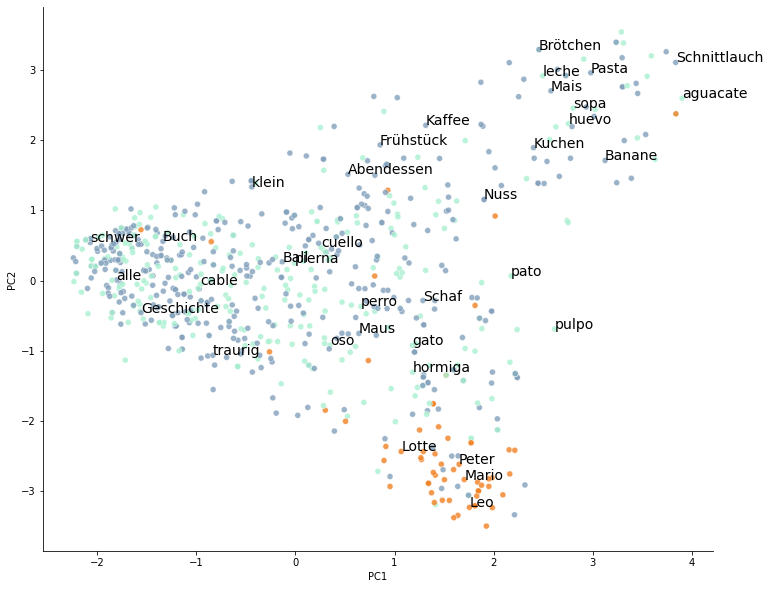

In [358]:
plt.figure(figsize= (12,10))
sns.scatterplot(data = concepts_pca,
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors, 
               legend= False, 
               alpha = 0.8)
sns.despine()
# Loop through the data points 
for word in highlight:
    x = concepts_pca.loc[concepts_pca['word'] == word, 'PC1']
    y = concepts_pca.loc[concepts_pca['word'] == word, 'PC2']
    text = word
    plt.text(x, y, text, size = 14)
#plt.axis('off')
#plt.show()
#plt.savefig('semantic_space.png')

In [48]:
colors = ['#82A0BC','#F28123','#A9F0D1']

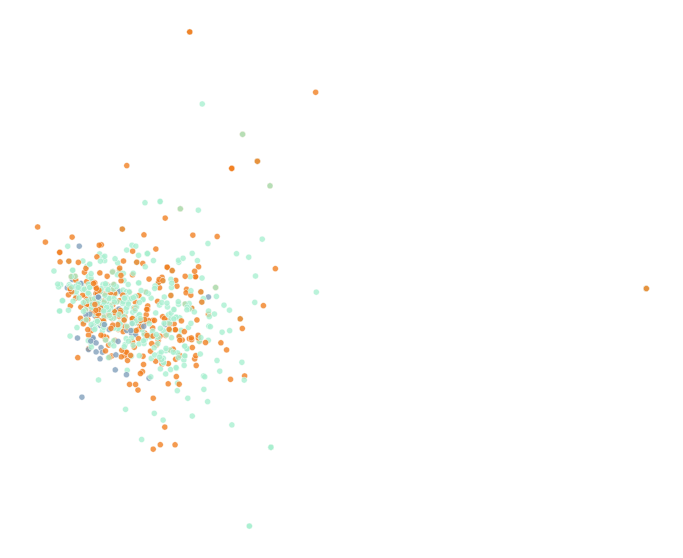

In [49]:
plt.figure(figsize= (12,10))
sns.scatterplot(data = concepts_pca,
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors, 
               legend= False, 
               alpha = 0.8)
sns.despine()
# Loop through the data points 
#for word in highlight:
#    x = concepts_pca.loc[concepts_pca['word'] == word, 'PC1']
#    y = concepts_pca.loc[concepts_pca['word'] == word, 'PC2']
#    text = concepts_pca.loc[concepts_pca['word'] == word, 'en_word'].any()
#    plt.text(x, y, text, size = 15, color = 'white')
plt.axis('off')
#plt.show()
plt.savefig('semantic_space_no_words.png', transparent = True)

#### Animated scatterplot

In [50]:
list(concepts_pca.loc[concepts_pca['Leo_months'] == 12, 'word'])

['luna', 'Banane', 'Pepe']

In [54]:
for month in concepts_pca['Leo_months'].unique():
    plt.figure(figsize= (12,10))
    sns.scatterplot(data = concepts_pca.loc[concepts_pca['Leo_months'] <= month],
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors_dic, 
               legend= False, 
               alpha = 0.8)
    sns.despine()
    highlight =  list(concepts_pca.loc[concepts_pca['Leo_months'] == month, 'word'])
    plt.xlim(-3,4)
    plt.ylim(-4,4)
    for word in highlight:
        x = concepts_pca.loc[concepts_pca['word'] == word, 'PC1']
        y = concepts_pca.loc[concepts_pca['word'] == word, 'PC2']
        text = word
        plt.text(x, y, text, size = 14, color = 'white')
    plt.axis('off')
    img_name = f'imgs/semantic_space_{month}.png'
    plt.savefig(img_name,transparent = True)
    plt.close()

In [55]:
import imageio

images = []

for month in concepts_pca['Leo_months'].unique():
    filename = f'imgs/semantic_space_{month}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('output_word_transparent.gif', images, fps=1)